<a href="https://colab.research.google.com/github/praneethweerawardana/ML-Prajects/blob/main/DeepNNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: praneethweerawardana
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 14.9MB/s]

In [5]:
data = pd.read_csv("random-linear-regression/test.csv")


In [6]:
data.head(5)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
X = data["x"]
y = data["y"]

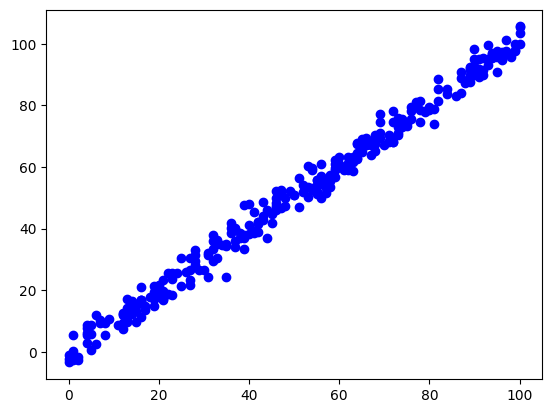

In [9]:
plt.scatter(X, y, c='b')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train.shape, X_test.shape

((240,), (60,))

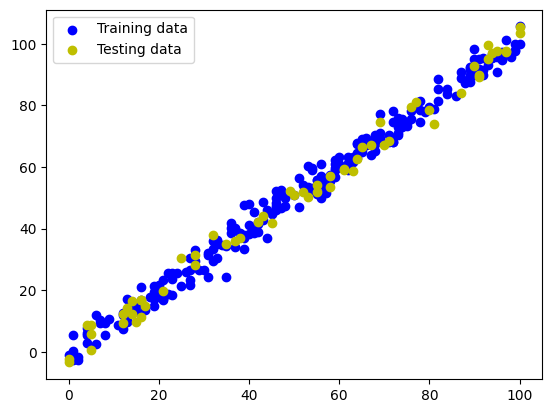

In [12]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

In [13]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 [==============================] - 6s 4ms/step - loss: 2.9083 - mae: 2.9083
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4046 - mae: 2.4046
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4085 - mae: 2.4085
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 2.6254 - mae: 2.6254


In [14]:
X_train.shape

(240,)

In [15]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 9ms/step


array([[90.26014 ],
       [76.20209 ],
       [94.276726],
       [ 4.907643],
       [91.26428 ]], dtype=float32)

In [18]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

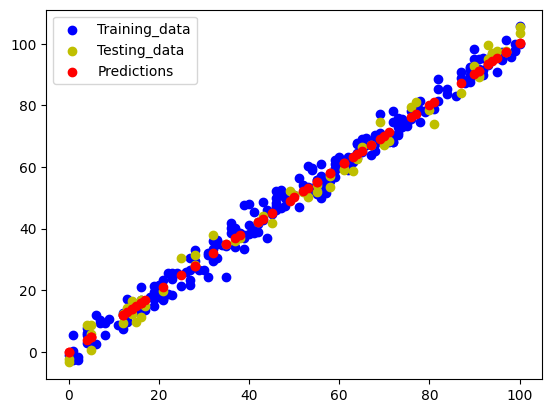

In [19]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

In [20]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2.5039 - mae: 2.5039


[2.5039093494415283, 2.5039093494415283]

In [21]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5039093>

In [22]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.32612>

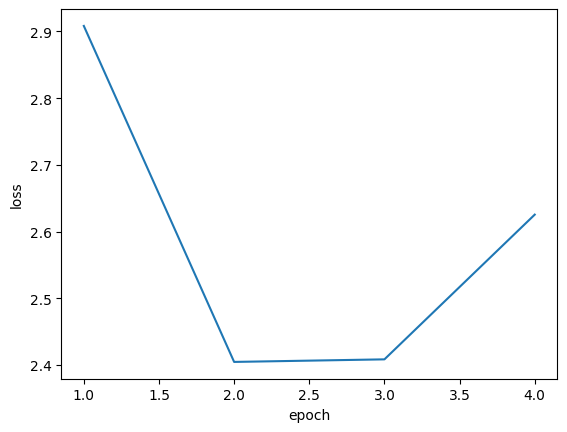

In [23]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.8181297  -0.7924154  -0.44066665  0.785265  ]] 
Biases:
 [ 0.03107167  0.068345   -0.0293017  -0.03124182]

Weights:
 [[-0.9497374 ]
 [-0.01905837]
 [ 0.9317441 ]
 [ 0.7928852 ]] 
Biases:
 [-0.03020727]
